In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_csv = 'ap2020_anonymized_cleaned.csv'
plt.style.use('bmh')

In [2]:
df = pd.read_csv(file_csv)

duvod_values = df['důvod'].unique()
duvod_values

array(['bolest na hrudi', 'jiný', 'palpitace', 'kardioverze', 'bezvědomí',
       'dušnost'], dtype=object)

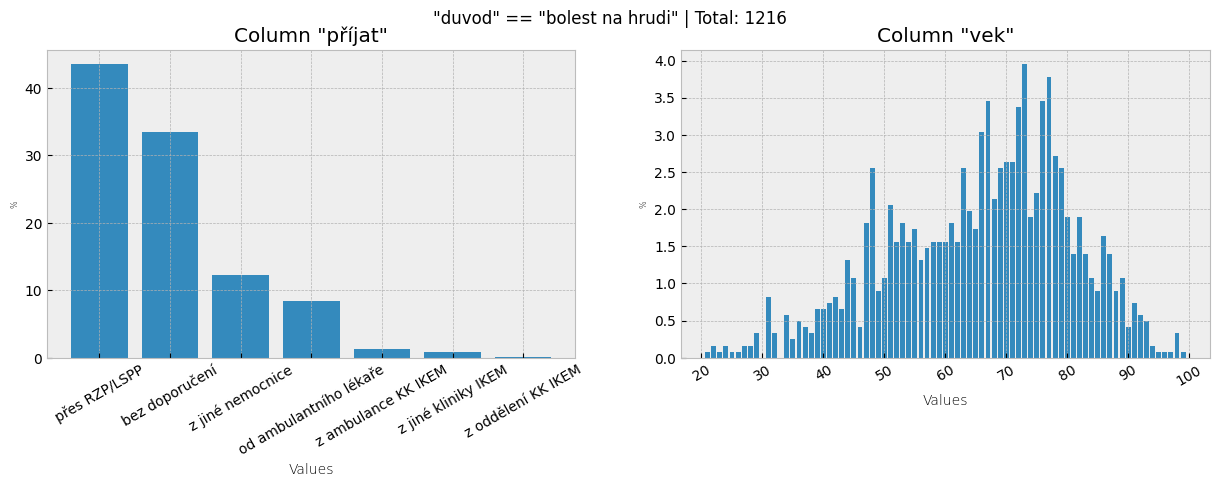

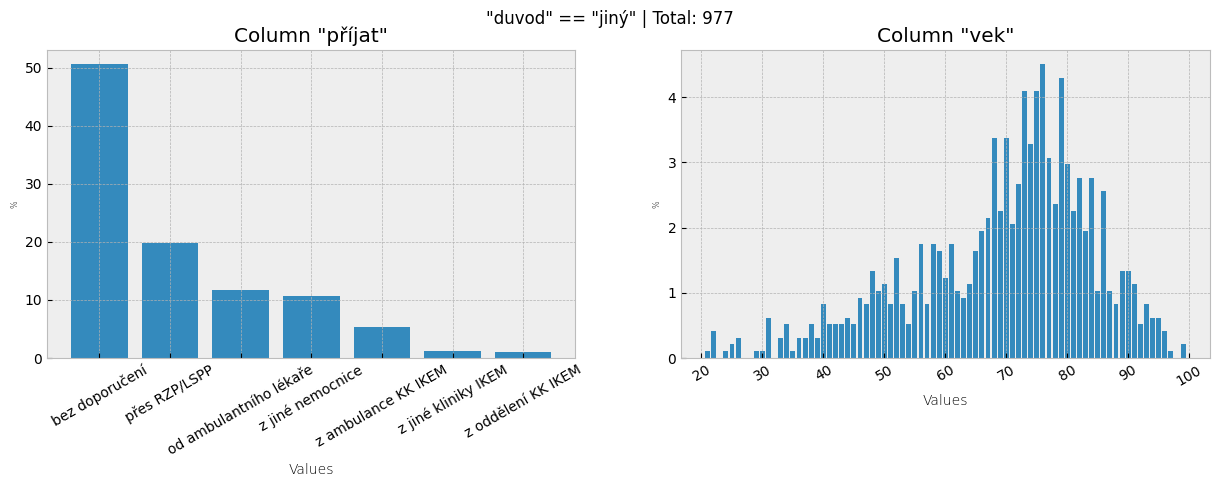

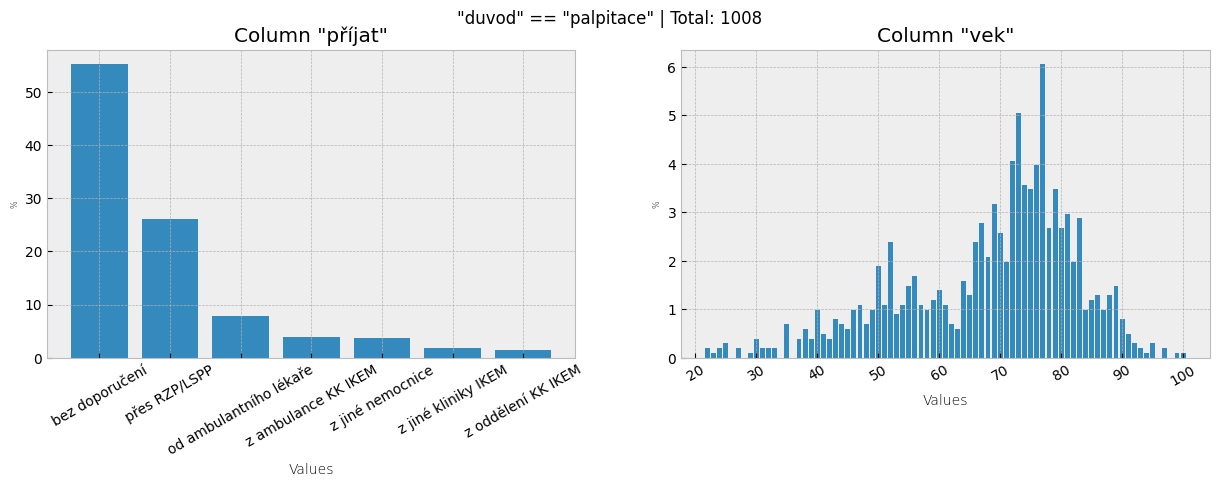

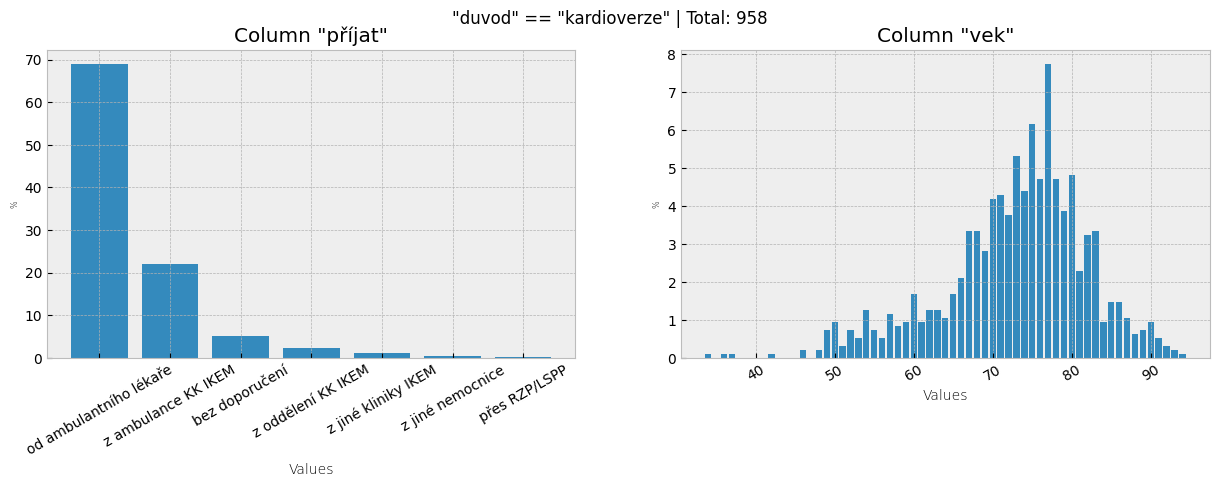

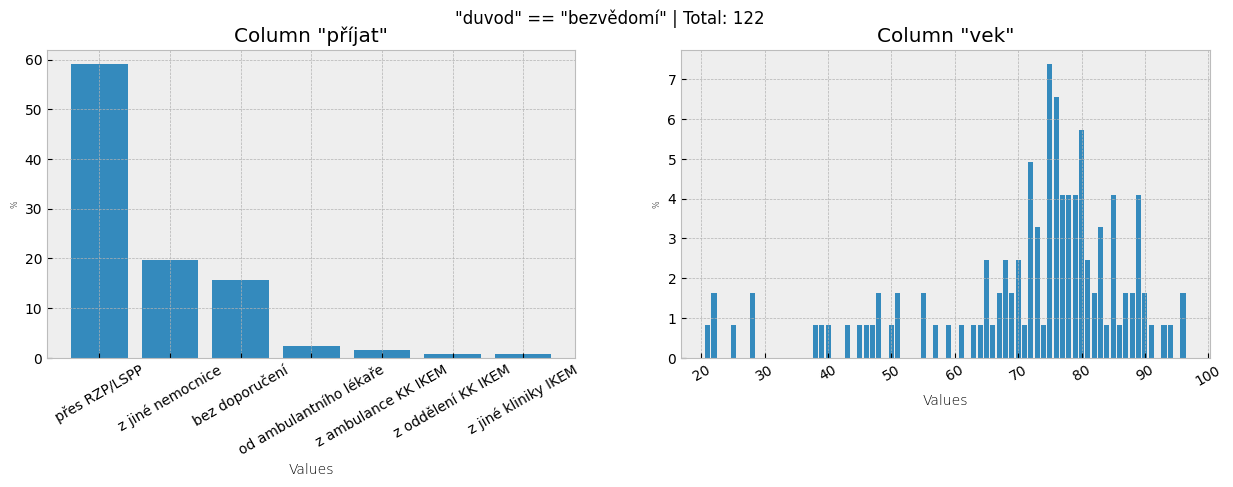

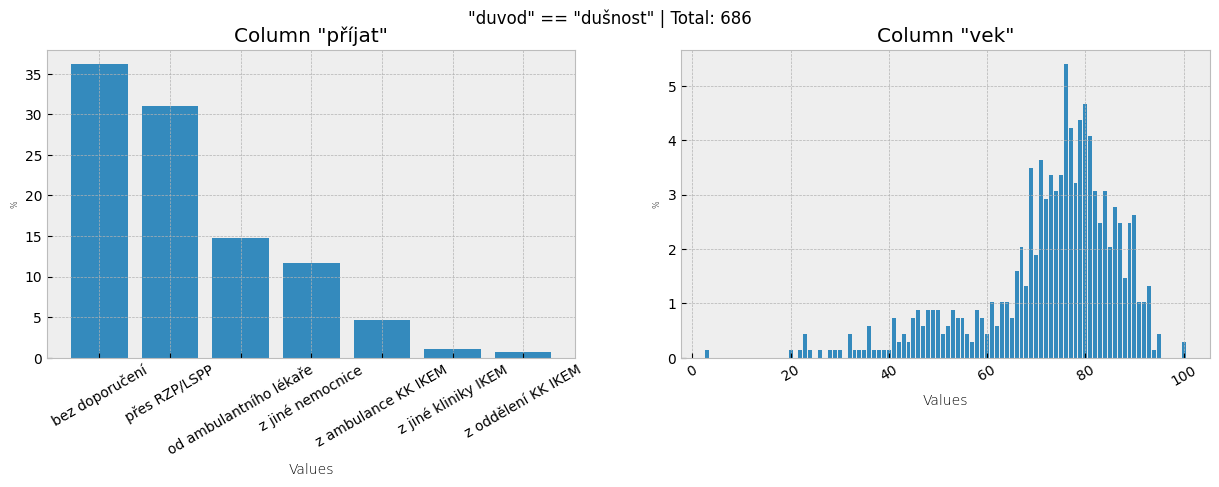

In [3]:
cat_cols = ['příjat', 'vek']

#fig, axes = plt.subplots(len(duvod_values), len(cat_cols))

for row_id, val in enumerate(duvod_values):
    fig, axes = plt.subplots(1, len(cat_cols))
    temp_df = df[df['důvod'] == val]
    fig.suptitle(f'"duvod" == "{val}" | Total: {len(temp_df)}')

    for col_idx, col in enumerate(cat_cols):
        values, counts = list(), list()
        value_counts = temp_df[col].value_counts()
        for row_idx in value_counts.keys():
            values.append( row_idx )
            counts.append( value_counts[row_idx] )
        
        # normalize to get percentage
        summed = sum(counts)
        counts = [ 100 * count / summed for count in counts ]

        ax = axes[col_idx]
        ax.set_title(f'Column "{col}"')
        ax.set_ylabel('%', fontweight='light', fontsize='xx-small')
        ax.set_xlabel('Values', fontweight='light')
        ax.bar(values, counts)
        ax.tick_params(
            axis='x',
            rotation=30,
            #horizontalalignment='right'
        )

        fig.set_size_inches(15, 4)

## Explanation of "duvod" categories

- bolest na hrudi

Most of these cases come from "RZP/LSPP" and "bez doporuceni", which is in line of common behaviour of people.

- jiny

These case most come "bez doporuceni" which is understandable since there are many cases that are not an emergency and people still want them checked out by medical professional.

- palpitace

These cases are not considered emergency but people generally want them checked out, so it is understandable that most cases come "bez doporuceni".

- kardioverze

This condition is mostly tested in specified office within hospital, so most people get there from other doctor which is in line of "od ambulantniho lekare".

- bezvedomi

Understandably, most cases come from "RZP/LSPP" since if someone faints near people, this means that emergency services will be called.

Also, there is noteably more cases (in percentage) of younger people which can be attributed to possible new experiences and shocks from them, but this hypothesis requires more data and discussion with specialist within area.

- dusnost

When people feel this way, they tend to either go to the doctor or call ambulance which is in line with the data we see.